In [14]:
import sys
sys.path.insert(0,'..')

from src.models import *
from src.loss_functions import *
from src.noise import *
from src.metrics import *
from src.plotting import *
from src.generate_data import *
from src.real_data import *
from src.abstain import *

import sklearn
import pandas as pd

from scipy.stats import bernoulli

from operator import xor

import os

In [15]:
# Define parameters
dataset = "cshock_mimic"
noise_type = "class_conditional"
batch_size = 1024
n_draws = 5
model_type = "LR"
training_loss = "None"
n_models = 5
max_iter = 1000
epsilon = 0.1
misspecify = "correct"

data = load_abstain(dataset, model_type, noise_type, misspecify=misspecify)


In [16]:
# results_df = metrics_active_learning(dataset, noise_type, model_type, data)

# # Save results
# #results_df.to_csv("experiment_results.csv", index=False)

In [17]:
parent_dir = "/scratch/hdd001/home/snagaraj/"
files_path = os.path.join(parent_dir, "results", "abstain", dataset, model_type, noise_type, "correct")

pkl_path = os.path.join(files_path, f"{epsilon}.pkl")
csv_path = os.path.join(files_path, "results.csv")

    # Open a file for writing in binary mode
with open(pkl_path, 'rb') as file:
    # Use pickle to write the dictionary to the file
    data = pkl.load(file)


results_df = pd.read_csv(csv_path)

results_df

,metric,value,coverage,threshold,noise,loss,draw_id,method,experiment_type
0,risk,19.403474,100.000000,0.00,0.05,BCE,0,confidence,abstain
1,regret,2.163225,100.000000,0.00,0.05,BCE,0,confidence,abstain
2,fpr,1.769912,100.000000,0.00,0.05,BCE,0,confidence,abstain
3,fnr,0.393314,100.000000,0.00,0.05,BCE,0,confidence,abstain
4,risk,19.403474,100.000000,0.00,0.05,BCE,0,ambiguity,abstain
...,...,...,...,...,...,...,...,...,...
14732,risk,38.709677,1.016060,0.99,0.40,BCE,4,ambiguity,abstain
14733,regret,0.000000,1.016060,0.99,0.40,BCE,4,ambiguity,abstain
14734,fpr,0.000000,1.016060,0.99,0.40,BCE,4,ambiguity,abstain
14735,fnr,0.000000,1.016060,0.99,0.40,BCE,4,ambiguity,abstain


In [18]:
results_df[(results_df["metric"]== "risk") & (results_df["experiment_type"]== "drop")]

,metric,value,coverage,threshold,noise,loss,draw_id,method,experiment_type
8,risk,19.403474,100.000000,0.00,0.05,BCE,0,confidence,drop
9,risk,19.403474,100.000000,0.00,0.05,BCE,0,ambiguity,drop
18,risk,19.239594,99.000246,0.01,0.05,BCE,0,confidence,drop
19,risk,19.600131,99.000246,0.01,0.05,BCE,0,ambiguity,drop
28,risk,19.239594,98.000492,0.02,0.05,BCE,0,confidence,drop
...,...,...,...,...,...,...,...,...,...
14700,risk,39.790233,5.006966,0.95,0.40,BCE,4,confidence,drop
14709,risk,38.970829,4.007211,0.96,0.40,BCE,4,confidence,drop
14718,risk,40.511308,3.007457,0.97,0.40,BCE,4,confidence,drop
14727,risk,41.068502,2.007703,0.98,0.40,BCE,4,confidence,drop


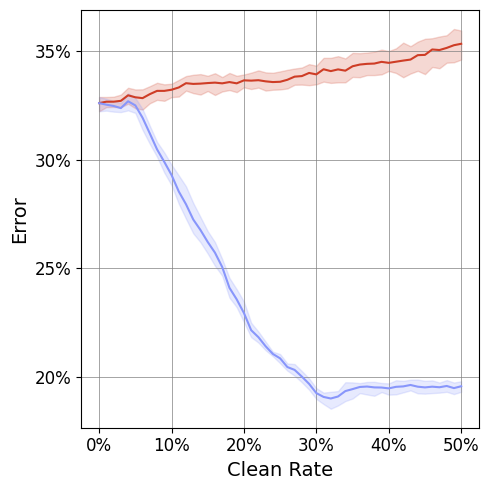

In [33]:
import matplotlib.ticker as mtick

# List of datasets and renamed titles
datasets = ["cshock_eicu", "cshock_mimic", "support", "lungcancer"]

dataset_titles = {
    "cshock_eicu": "shock_eicu",
    "cshock_mimic": "shock_mimic",
    "saps": "mortality",
    "support": "support",
    "lungcancer": "lungcancer"
}

# Only plot regret metric
metrics = ["risk"]

# Define your custom color palette for each method
method_colors = {
    "Ambiguity": "#8896FB",  # Purple
    "Majority":  "#800080",  # Red
    "Loo":  "#00FF00",
    "Mean_plausible":  "#228B22",
    "Conformal": "#93C572",
    "Confidence": "#ce3d26",
    "Entropy": "#2478d8"  # Grey
}

y_labels = {"risk": "Error"}

experiment_type = "drop"
loss_type = "BCE"
noise_level = 0.4

# Create a figure with 1 row (only for regret metric)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharex=True)

# Read the data and process
results_df['method'] = results_df['method'].str.capitalize()
results_df["abstention"] = 100 - results_df["coverage"]

# Subset data based on loss_type, noise_level, and experiment_type
sub_data = results_df[(results_df["loss"] == loss_type) 
                      & (results_df["noise"] == noise_level) 
                      & (results_df["coverage"] >50)
                      & (results_df["experiment_type"] == experiment_type)]

# Plot regret metric
for method in sub_data['method'].unique():
    method_data = sub_data[(sub_data['method'] == method) & (sub_data['metric'] == "risk")]
    sns.lineplot(data=method_data, x="abstention", y="value", ax=ax, color=method_colors.get(method, "#808080"), label=method)

# Set labels and grid
ax.set_xlabel("Clean Rate", fontsize=14)
ax.set_ylabel(y_labels["risk"], fontsize=14)
ax.yaxis.get_major_locator().set_params(integer=True)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.grid(True, which='both', color='grey', linestyle='-', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend().remove()

plt.tight_layout()

plt.savefig('/h/snagaraj/noise_multiplicity/figures/drop.pdf', dpi=300, bbox_inches='tight')

plt.show()


In [31]:
sub_data[
        (sub_data["coverage"] >= 59) & 
        (sub_data["coverage"] <= 61) & 
        (sub_data["metric"] == "risk") & 
        (sub_data["noise"] == 0.4)].groupby("method").mean(numeric_only=True)  


,value,coverage,threshold,noise,draw_id,abstention
method,,,,,,
Ambiguity,19.491970,59.501762,0.405,0.4,2.0,40.498238
Confidence,34.480498,59.501762,0.405,0.4,2.0,40.498238


In [32]:
34.48-19.49

14.989999999999998